<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Laboratorio_10_EoML_NMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 10

En este laboratorio encontraremos el valor óptimo de k en k-mean clustering con una gráfica de distancia cuadrada media respecto a k

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

print("Todos los paquetes han sido importados.")

Todos los paquetes han sido importados.


In [0]:
mlrurl = "http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(mlrurl) 


In [0]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [0]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Trabajaremos sobre la base de datos de casas de Wholesales costumers, que se encuentra en [Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

1.   Enumera qué variables son continuas y qué variables son categóricas
   * Channel - Categorica
   * Region - Categorica
   * Fresh - Continua
   * Milk - Continua
   * Grocery - Continua
   * Frozen - Continua
   * Detergents_Paper - Continua
   * Delicassen - Continua
   




2.   Despliega la estadística descriptiva de las variables continuas del dataset para explorarlo.



In [0]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


3.   Convierte las variables categóricas en binarias usando pd.get_dummies.



In [0]:
cat_columns = ['Channel', 'Region']
for col in cat_columns:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


4.   Estandariza las variables usando una escala estándar (StandardScaler). Explica por qué este paso es importante.



In [0]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


* El StandardScaler asume que sus datos se distribuyen normalmente dentro de cada función y los escala de tal manera que la distribución esté centrada alrededor de 0, con una desviación estándar de 1. La media y la desviación estándar se calculan para la característica y luego la característica se escala en función de: xi – mean (x) stdev (x)

* Es importante porque los datos no estan distribuidos normalmente ni en la misma escala.

5.   En un rango de 1 a 15 para k, realiza el clustering sobre los datos y para cada k guarda el valor de la distancia cuadrada media.





In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

6.   Haz una gráfica de k contra la distancia cuadrada media. ¿Qué criterio puedes usar para identificar el valor óptimo de k? ¿Qué pasa cuando k se aproxima a n, la cantidad de observaciones?



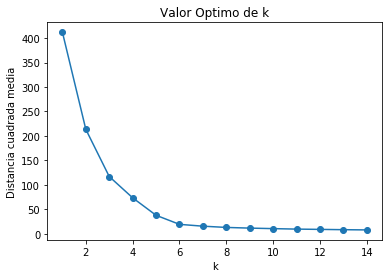

In [0]:
plt.plot(K, Sum_of_squared_distances, 'o-')
plt.xlabel('k')
plt.ylabel('Distancia cuadrada media')
plt.title('Valor Optimo de k')
plt.show()

7.   Repite el clustering ahora usando el valor óptimo de k. Ubica la posición de cada centroide y comenta acerca de cada uno (por ejemplo, ¿qué valores para cada variable caracterizan a cada centroide?)

In [0]:
km2 = KMeans(n_clusters=6)
km2 = km2.fit(data_transformed)

In [0]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels


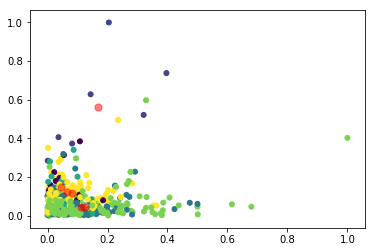

In [0]:
centers, labels = find_clusters(data_transformed, 6, rseed=0)
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels,
            s=25, cmap='viridis');

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5);

* Los centroides encontrados se adaptan a cada cluster diferente encontrado y su grupo. El centroide con su cluster mas clase es el verde palido. No se marca claramente cada cluster sin embargo asi que no deja mucho a las caracteristicas de cada uno.